# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from collections import OrderedDict
from flask import jsonify
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

685

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#
url1 = 'http://api.openweathermap.org/data/2.5/weather?q='
url2 = '&units=imperial&APPID='
key = api_keys.api_key

record = 0
responses = []

print('Beginning Data Retrieval')
print('------------------------------')
for city in cities:
    city_data = requests.get( url1 + city + url2 + key ).json()
    if city_data['cod'] == '404':
        print('City not found.  Skipping....')
        continue
    print(f'Processing Record {record} and pausing 1 seconds | {city_data["name"]}')
    responses.append(city_data)
    time.sleep(1)
    record += 1

Beginning Data Retrieval
------------------------------
Processing Record 0 and pausing 1 seconds | Butaritari
Processing Record 1 and pausing 1 seconds | Santa Maria
Processing Record 2 and pausing 1 seconds | East London
Processing Record 3 and pausing 1 seconds | Mataura
City not found.  Skipping....
Processing Record 4 and pausing 1 seconds | Arraial do Cabo
Processing Record 5 and pausing 1 seconds | Bada
Processing Record 6 and pausing 1 seconds | Nantucket
Processing Record 7 and pausing 1 seconds | Ribeira Grande
Processing Record 8 and pausing 1 seconds | Ahipara
Processing Record 9 and pausing 1 seconds | Kosh-Agach
Processing Record 10 and pausing 1 seconds | Progreso
Processing Record 11 and pausing 1 seconds | Tilichiki
Processing Record 12 and pausing 1 seconds | Umm Lajj
Processing Record 13 and pausing 1 seconds | Nome
Processing Record 14 and pausing 1 seconds | Ushuaia
Processing Record 15 and pausing 1 seconds | Taoudenni
Processing Record 16 and pausing 1 seconds | 

In [21]:
#method to flatten a json object, google helped.  Used im next cell
def flattenPattern(pattern):
    newPattern = {}
    if type(pattern) is list:
        pattern = pattern[0]
    if type(pattern) is not str:
        for key, value in pattern.items():
            if type(value) in (list, dict):
                returnedData = flattenPattern(value)
                for i,j in returnedData.items():
                        if key == "data":
                            newPattern[i] = j
                        else:
                            newPattern[key + "." + i] = j
            else:
                newPattern[key] = value
    return newPattern 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#flattenning each record then putting it into a list
flatdata = []
for record in responses:
    flatdata.append(flattenPattern(record))
    
#dataframe creation, renaming columns, then creating a new dataframe w/ just the columns we need, along w/ CSV  
data = pd.DataFrame(flatdata)
data = data.rename(columns={'name': 'City', 'clouds.all': 'Cloudiness',
                            'sys.country': 'Country', 'coord.lat': 'Lat',
                            'coord.lon': 'Long', 'main.temp_max': 'MaxTemp',
                            'main.humidity': 'Humidity', 'wind.speed': 'WindSpeed',
                            'dt': 'Date' })
finaldata = data[['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Long', 'MaxTemp', 'WindSpeed']]
finaldata.to_csv('output.csv', index=False)


In [20]:
#importing data set from CSV so I don't have to re-run all the API cells again to get a live dataframe
data = pd.read_csv('output.csv')


#data['Cloudiness'] = pd.to_numeric(data['Cloudiness'])
#data['Lat'] = pd.to_numeric(data['Lat'])
#data['MaxTemp'] = pd.to_numeric(data['MaxTemp'])

data.dtypes
#data.head()

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Long          float64
MaxTemp       float64
WindSpeed     float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

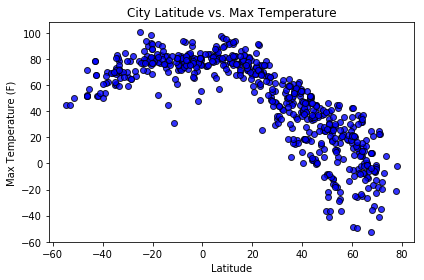

In [45]:
lat_temp = data[['Lat', 'MaxTemp']]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.scatter(lat_temp.Lat, lat_temp.MaxTemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.8)
plt.tight_layout()
plt.savefig("Latitude vs Temperature plot")
plt.show()

#### Latitude vs. Humidity Plot

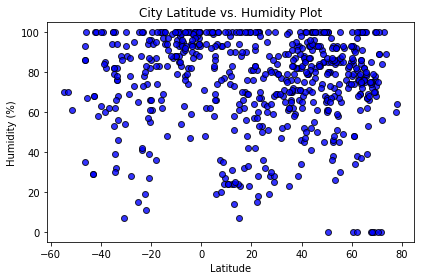

In [46]:
lat_humidity = data[['Lat', 'Humidity']]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity Plot")
plt.scatter(lat_humidity.Lat, lat_humidity.Humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.8)
plt.tight_layout()
plt.savefig("Latitude vs Humidity plot")
plt.show()

#### Latitude vs. Cloudiness Plot

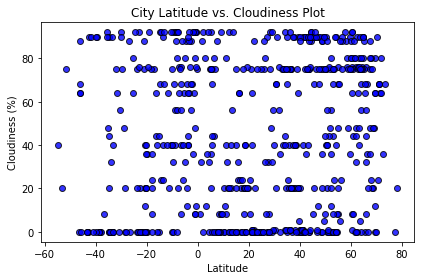

In [47]:
lat_cloud = data[['Lat', 'Cloudiness']]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness Plot")
plt.scatter(lat_cloud.Lat, lat_cloud.Cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.8)
plt.tight_layout()
plt.savefig("Latitude vs Cloudiness plot")
plt.show()

#### Latitude vs. Wind Speed Plot

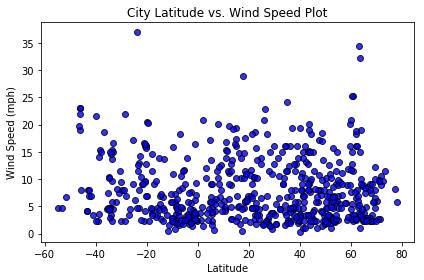

In [48]:
lat_wind = data[['Lat', 'WindSpeed']]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed Plot")
plt.scatter(lat_wind.Lat, lat_wind.WindSpeed, marker="o", facecolors="blue", edgecolors="black", alpha=0.8)
plt.tight_layout()
plt.savefig("Latitude vs Wind Speed plot")
plt.show()

#### Longitude Plots

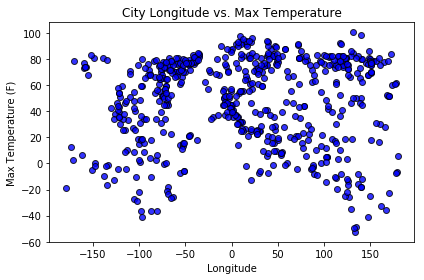

In [49]:
long_temp = data[['Long', 'MaxTemp']]
plt.xlabel("Longitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Longitude vs. Max Temperature")
plt.scatter(long_temp.Long, long_temp.MaxTemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.8)
plt.tight_layout()
plt.savefig("Longitude vs Temperature plot")
plt.show()


#### As you can see, plotting the longitude isn't very useful.  Since any given longitude may have cities of all temperatures, unlike latitude, the graph is somewhat representative of the shape of the earth's continents, nothing more.